In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

sns.set(style="whitegrid")
%matplotlib inline

In [3]:
# Đọc dữ liệu
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data_dict = pd.read_csv('data_dictionary.csv')

In [4]:
display(train.head())

id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
4  0016bb22                    Spring               18                1   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             51.0            Fall     16.877316             46.0   
1         NaN              NaN            Fall     14.035590             48.0   
2        Fall             71.0            Fall     16.648696             56.5   
3        Fall             71.0          Summer     18.292347             56.0   
4      Summer              NaN             NaN           NaN              NaN   

   Physical-Weight  ...  PCIAT-PCIAT_18  PCIAT-PCIAT_19  PCIAT-PCIAT_20  \
0             50.8  ...             4.0             2.0             4.0   
1             46.0  ...             0.0             0.0             0.0   
2             75.6  ...             2.0             1.0             1.0   
3             81.6  ...             3.0             4.0             1.0   
4              NaN  ...             NaN             NaN             NaN   

   PCIAT-PCIAT_Total SDS-Season  SDS-SDS_Total_Raw  SDS-SDS_Total_T  \
0               55.0        NaN                NaN              NaN   
1                0.0       Fall               46.0             64.0   
2               28.0       Fall               38.0             54.0   
3               44.0     Summer               31.0             45.0   
4                NaN        NaN                NaN              NaN   

   PreInt_EduHx-Season PreInt_EduHx-computerinternet_hoursday  sii  
0                 Fall                                    3.0  2.0  
1               Summer                                    0.0  0.0  
2               Summer                                    2.0  0.0  
3               Winter                                    0.0  1.0  
4                  NaN                                    NaN  NaN  

[5 rows x 82 columns]

In [5]:
display(test.head())

id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
4  0016bb22                    Spring               18                1   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             51.0            Fall     16.877316             46.0   
1         NaN              NaN            Fall     14.035590             48.0   
2        Fall             71.0            Fall     16.648696             56.5   
3        Fall             71.0          Summer     18.292347             56.0   
4      Summer              NaN             NaN           NaN              NaN   

   Physical-Weight  ...  BIA-BIA_TBW  PAQ_A-Season  PAQ_A-PAQ_A_Total  \
0             50.8  ...      32.6909           NaN                NaN   
1             46.0  ...      27.0552           NaN                NaN   
2             75.6  ...          NaN           NaN                NaN   
3             81.6  ...      45.9966           NaN                NaN   
4              NaN  ...          NaN        Summer               1.04   

   PAQ_C-Season PAQ_C-PAQ_C_Total  SDS-Season  SDS-SDS_Total_Raw  \
0           NaN               NaN         NaN                NaN   
1          Fall             2.340        Fall               46.0   
2        Summer             2.170        Fall               38.0   
3        Winter             2.451      Summer               31.0   
4           NaN               NaN         NaN                NaN   

   SDS-SDS_Total_T PreInt_EduHx-Season  PreInt_EduHx-computerinternet_hoursday  
0              NaN                Fall                                     3.0  
1             64.0              Summer                                     0.0  
2             54.0              Summer                                     2.0  
3             45.0              Winter                                     0.0  
4              NaN                 NaN                                     NaN  

[5 rows x 59 columns]

In [6]:
data_dict.head()

Instrument                      Field  \
0                          Identifier                         id   
1                        Demographics  Basic_Demos-Enroll_Season   
2                        Demographics            Basic_Demos-Age   
3                        Demographics            Basic_Demos-Sex   
4  Children's Global Assessment Scale                CGAS-Season   

               Description             Type                        Values  \
0         Participant's ID              str                           NaN   
1     Season of enrollment              str  Spring, Summer, Fall, Winter   
2       Age of participant            float                           NaN   
3       Sex of participant  categorical int                           0,1   
4  Season of participation              str  Spring, Summer, Fall, Winter   

       Value Labels  
0               NaN  
1               NaN  
2               NaN  
3  0=Male, 1=Female  
4               NaN

In [7]:
def calculate_stats(data, columns):
    if isinstance(columns, str):
        columns = [columns]

    stats = []
    for col in columns:
        if data[col].dtype in ['object', 'category']:
            counts = data[col].value_counts(dropna=False, sort=False)
            percents = data[col].value_counts(normalize=True, dropna=False, sort=False) * 100
            formatted = counts.astype(str) + ' (' + percents.round(2).astype(str) + '%)'
            stats_col = pd.DataFrame({'count (%)': formatted})
            stats.append(stats_col)
        else:
            stats_col = data[col].describe().to_frame().transpose()
            stats_col['missing'] = data[col].isnull().sum()
            stats_col.index.name = col
            stats.append(stats_col)

    return pd.concat(stats, axis=0)

In [8]:
train_cols = set(train.columns)
test_cols = set(test.columns)
columns_not_in_test = sorted(list(train_cols - test_cols))
data_dict[data_dict['Field'].isin(columns_not_in_test)]

Instrument              Field  \
54  Parent-Child Internet Addiction Test       PCIAT-Season   
55  Parent-Child Internet Addiction Test     PCIAT-PCIAT_01   
56  Parent-Child Internet Addiction Test     PCIAT-PCIAT_02   
57  Parent-Child Internet Addiction Test     PCIAT-PCIAT_03   
58  Parent-Child Internet Addiction Test     PCIAT-PCIAT_04   
59  Parent-Child Internet Addiction Test     PCIAT-PCIAT_05   
60  Parent-Child Internet Addiction Test     PCIAT-PCIAT_06   
61  Parent-Child Internet Addiction Test     PCIAT-PCIAT_07   
62  Parent-Child Internet Addiction Test     PCIAT-PCIAT_08   
63  Parent-Child Internet Addiction Test     PCIAT-PCIAT_09   
64  Parent-Child Internet Addiction Test     PCIAT-PCIAT_10   
65  Parent-Child Internet Addiction Test     PCIAT-PCIAT_11   
66  Parent-Child Internet Addiction Test     PCIAT-PCIAT_12   
67  Parent-Child Internet Addiction Test     PCIAT-PCIAT_13   
68  Parent-Child Internet Addiction Test     PCIAT-PCIAT_14   
69  Parent-Child Internet Addiction Test     PCIAT-PCIAT_15   
70  Parent-Child Internet Addiction Test     PCIAT-PCIAT_16   
71  Parent-Child Internet Addiction Test     PCIAT-PCIAT_17   
72  Parent-Child Internet Addiction Test     PCIAT-PCIAT_18   
73  Parent-Child Internet Addiction Test     PCIAT-PCIAT_19   
74  Parent-Child Internet Addiction Test     PCIAT-PCIAT_20   
75  Parent-Child Internet Addiction Test  PCIAT-PCIAT_Total   

                                          Description             Type  \
54                            Season of participation              str   
55  How often does your child disobey time limits ...  categorical int   
56  How often does your child neglect household ch...  categorical int   
57  How often does your child prefer to spend time...  categorical int   
58  How often does your child form new relationshi...  categorical int   
59  How often do you complain about the amount of ...  categorical int   
60  How often do your child's grades suffer becaus...  categorical int   
61  How often does your child check his or her e-m...  categorical int   
62  How often does your child seem withdrawn from ...  categorical int   
63  How often does your child become defensive or ...  categorical int   
64  How often have you caught your child sneaking ...  categorical int   
65  How often does your child spend time along in ...  categorical int   
66  How often does your child receive strange phon...  categorical int   
67  How often does your child snap, yell, or act a...  categorical int   
68  How often does your child seem more tired and ...  categorical int   
69  How often does your child seem preoccupied wit...  categorical int   
70  How often does your child throw tantrums with ...  categorical int   
71  How often does your child choose to spend time...  categorical int   
72  How often does your child become angry or bell...  categorical int   
73  How often does your child choose to spend more...  categorical int   
74  How often does your child feel depressed, mood...  categorical int   
75                                        Total Score              int   

                          Values  \
54  Spring, Summer, Fall, Winter   
55                   0,1,2,3,4,5   
56                   0,1,2,3,4,5   
57                   0,1,2,3,4,5   
58                   0,1,2,3,4,5   
59                   0,1,2,3,4,5   
60                   0,1,2,3,4,5   
61                   0,1,2,3,4,5   
62                   0,1,2,3,4,5   
63                   0,1,2,3,4,5   
64                   0,1,2,3,4,5   
65                   0,1,2,3,4,5   
66                   0,1,2,3,4,5   
67                   0,1,2,3,4,5   
68                   0,1,2,3,4,5   
69                   0,1,2,3,4,5   
70                   0,1,2,3,4,5   
71                   0,1,2,3,4,5   
72                   0,1,2,3,4,5   
73                   0,1,2,3,4,5   
74                   0,1,2,3,4,5   
75                           NaN   

                                         Value L

In [9]:
train_with_sii = train[train['sii'].notna()][columns_not_in_test]
train_with_sii[train_with_sii.isna().any(axis=1)].head().style.applymap(
    lambda x: 'background-color: #FFC0CB' if pd.isna(x) else ''
)

In [10]:
PCIAT_cols = [f'PCIAT-PCIAT_{i+1:02d}' for i in range(20)]
recalc_total_score = train_with_sii[PCIAT_cols].sum(
    axis=1, skipna=True
)
(recalc_total_score == train_with_sii['PCIAT-PCIAT_Total']).all()

True

In [11]:
def recalculate_sii(row):
    if pd.isna(row['PCIAT-PCIAT_Total']):
        return np.nan
    max_possible = row['PCIAT-PCIAT_Total'] + row[PCIAT_cols].isna().sum() * 5
    if row['PCIAT-PCIAT_Total'] <= 30 and max_possible <= 30:
        return 0
    elif 31 <= row['PCIAT-PCIAT_Total'] <= 49 and max_possible <= 49:
        return 1
    elif 50 <= row['PCIAT-PCIAT_Total'] <= 79 and max_possible <= 79:
        return 2
    elif row['PCIAT-PCIAT_Total'] >= 80 and max_possible >= 80:
        return 3
    return np.nan

train['recalc_sii'] = train.apply(recalculate_sii, axis=1)

In [12]:
mismatch_rows = train[
    (train['recalc_sii'] != train['sii']) & train['sii'].notna()
]

mismatch_rows[PCIAT_cols + [
    'PCIAT-PCIAT_Total', 'sii', 'recalc_sii'
]].style.applymap(
    lambda x: 'background-color: #FFC0CB' if pd.isna(x) else ''
)


In [13]:
train['sii'] = train['recalc_sii']
train['complete_resp_total'] = train['PCIAT-PCIAT_Total'].where(
    train[PCIAT_cols].notna().all(axis=1), np.nan
)

sii_map = {0: '0 (None)', 1: '1 (Mild)', 2: '2 (Moderate)', 3: '3 (Severe)'}
train['sii'] = train['sii'].map(sii_map).fillna('Missing')

sii_order = ['Missing', '0 (None)', '1 (Mild)', '2 (Moderate)', '3 (Severe)']
train['sii'] = pd.Categorical(train['sii'], categories=sii_order, ordered=True)

train.drop(columns='recalc_sii', inplace=True)

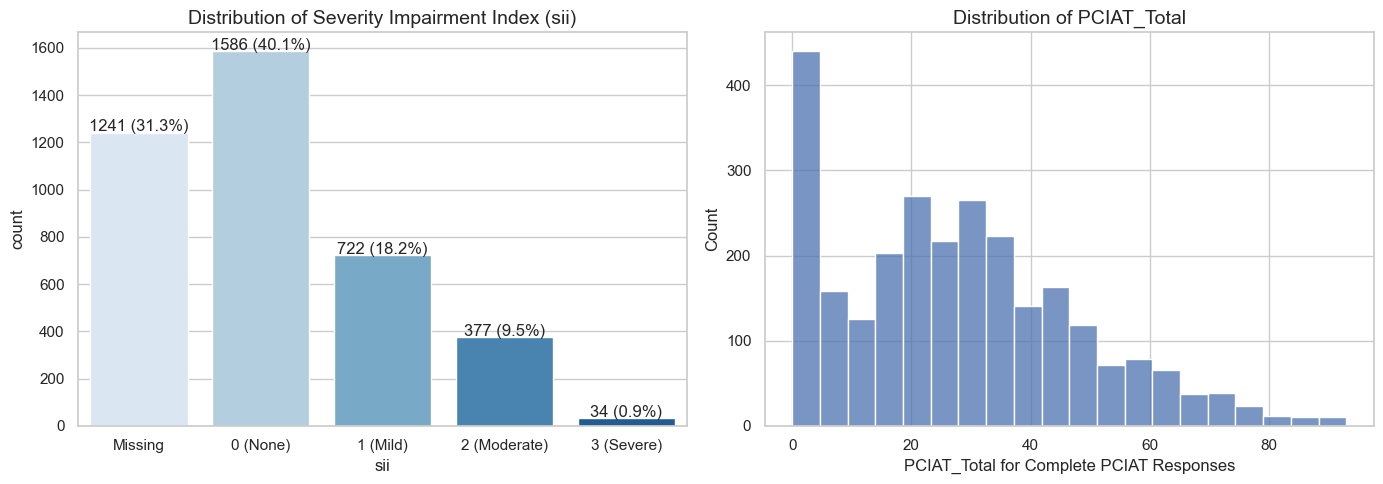

In [14]:
sii_counts = train['sii'].value_counts().reset_index()
sii_counts.columns = ['sii', 'count']
total = sii_counts['count'].sum()
sii_counts['percentage'] = (sii_counts['count'] / total) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# SII
sns.barplot(x='sii', y='count', data=sii_counts, palette='Blues', ax=axes[0])
axes[0].set_title('Distribution of Severity Impairment Index (sii)', fontsize=14)
for p in axes[0].patches:
    height = p.get_height()
    percentage = sii_counts.loc[sii_counts['count'] == height, 'percentage'].values[0]
    axes[0].text(
        p.get_x() + p.get_width() / 2,
        height + 5, f'{int(height)} ({percentage:.1f}%)',
        ha="center", fontsize=12
    )

# PCIAT_Total for complete responses
sns.histplot(train['complete_resp_total'].dropna(), bins=20, ax=axes[1])
axes[1].set_title('Distribution of PCIAT_Total', fontsize=14)
axes[1].set_xlabel('PCIAT_Total for Complete PCIAT Responses')

plt.tight_layout()
plt.show()


Như vậy, qua phân tích, có 1241 trường hợp Missing (tức là số mẫu mà người được phỏng vấn không trả lời hết tất cả các câu dẫn đến không thể tính chính xác được điểm sii)

# Phân tích và trực quan hóa các thông tin về chỉ số sii theo độ tuổi và giới tính

In [15]:
# kiểm tra cột age và sex xem có giá trị nào thiếu không
assert train['Basic_Demos-Age'].isna().sum() == 0
assert train['Basic_Demos-Sex'].isna().sum() == 0

In [16]:
# Tỉ lệ phân bố theo từng nhóm tuổi
train['Age Group'] = pd.cut(
    train['Basic_Demos-Age'],
    bins=[4, 12, 18, 22],
    labels=['Children (5-12)', 'Adolescents (13-18)', 'Adults (19-22)']
)
calculate_stats(train, 'Age Group')

count (%)
Children (5-12)      2919 (73.71%)
Adolescents (13-18)   953 (24.07%)
Adults (19-22)          88 (2.22%)

In [17]:
# Tỉ lệ phân bố theo giới tính
sex_map = {0: 'Male', 1: 'Female'}
train['Basic_Demos-Sex'] = train['Basic_Demos-Sex'].map(sex_map)
calculate_stats(train, 'Basic_Demos-Sex')

count (%)
Male    2484 (62.73%)
Female  1476 (37.27%)

Trực quan hóa nhóm tuổi, độ tuổi, giới tính theo điểm sii

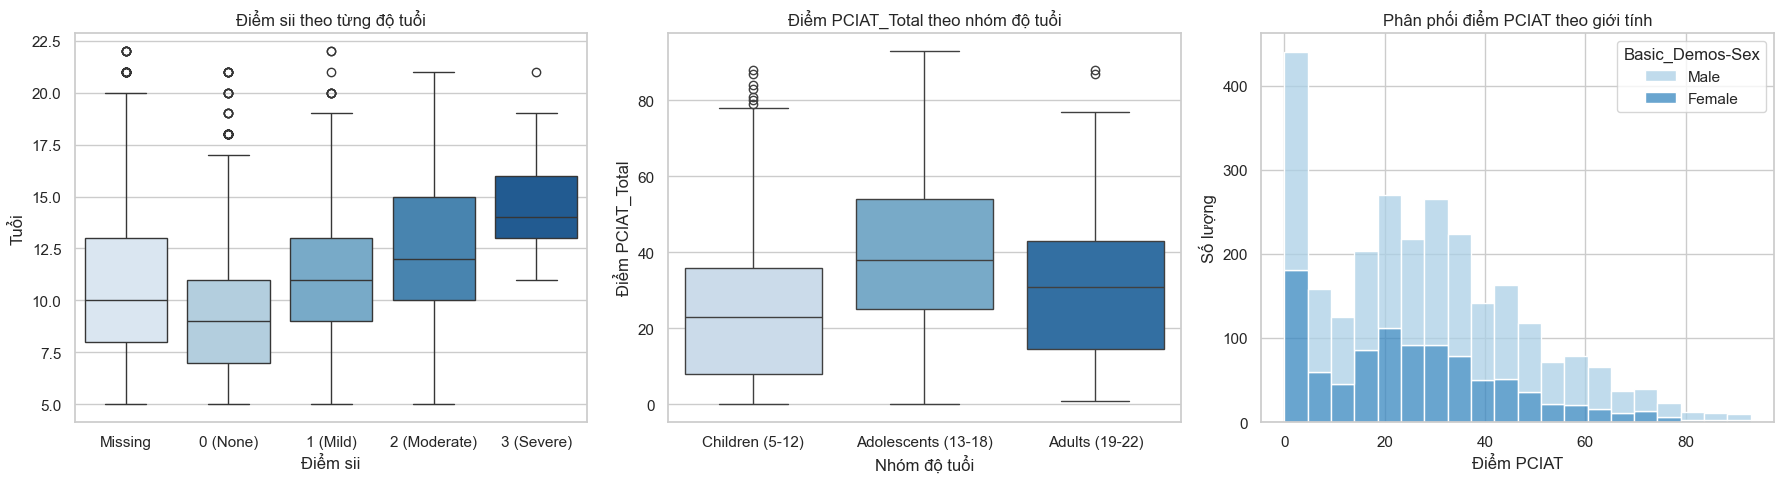

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Đồ thị con 1: sii theo độ tuổi
sns.boxplot(y=train['Basic_Demos-Age'], x=train['sii'], ax=axes[0], palette='Blues')
axes[0].set_title('Điểm sii theo từng độ tuổi')
axes[0].set_ylabel('Tuổi')
axes[0].set_xlabel('Điểm sii')

# Đồ thị con 2: sii theo nhóm độ tuổi
sns.boxplot(x=train['Age Group'], y=train['complete_resp_total'], ax=axes[1], palette='Blues')
axes[1].set_title('Điểm PCIAT_Total theo nhóm độ tuổi')
axes[1].set_xlabel('Nhóm độ tuổi')
axes[1].set_ylabel('Điểm PCIAT_Total')

# Đồ thị con 3: sii theo giới tính
sns.histplot(data=train, x='complete_resp_total', hue='Basic_Demos-Sex',multiple='stack', bins=20, palette='Blues', ax=axes[2])
axes[2].set_title('Phân phối điểm PCIAT theo giới tính')
axes[2].set_xlabel('Điểm PCIAT')
axes[2].set_ylabel('Số lượng')

plt.tight_layout()
plt.show()

Phân tích biểu đồ hộp (Box Plots):

 - Mối quan hệ giữa SII và độ tuổi:

Các điểm số SII cao hơn (tức là các mức độ nghiêm trọng như moderate và severe) thường liên quan đến các nhóm tuổi lớn hơn (ví dụ, nhóm adolescents và adults).
Có nghĩa là nhóm tuổi cao hơn có xu hướng bị ảnh hưởng nhiều hơn bởi vấn đề liên quan đến Internet, được thể hiện qua các điểm số SII cao hơn. Tuy nhiên, có một sự chồng chéo đáng kể giữa các nhóm độ tuổi trong mỗi mức điểm SII, tức là có những trường hợp trong các nhóm tuổi trẻ hơn vẫn có điểm SII cao.

 - Mối quan hệ giữa PCIAT_Total và độ tuổi:

Median PCIAT_Total (tổng PCIAT cho các phản hồi đầy đủ) cao hơn ở nhóm adolescents (thanh thiếu niên), chỉ ra rằng có một mối quan hệ hình chữ U giữa tuổi tác và sự suy giảm do vấn đề sử dụng Internet (PIU - Problematic Internet Use).
Do các thanh thiếu niên có xu hướng có điểm PCIAT_Total cao hơn, trong khi các nhóm tuổi khác có thể có điểm thấp hơn. Điều này gợi ý rằng vấn đề sử dụng Internet có thể đạt đỉnh trong độ tuổi thanh thiếu niên, sau đó giảm dần khi người ta lớn lên.



 - Sự khác biệt giữa nam và nữ:

Các sự khác biệt giữa nam và nữ là tương đối rõ ràng. Chứng tỏ có sử ảnh hưởng của Nam và Nữ đối với mức độ ảnh hưởng sii.


 - Phân phối sii theo từng độ tuổi:

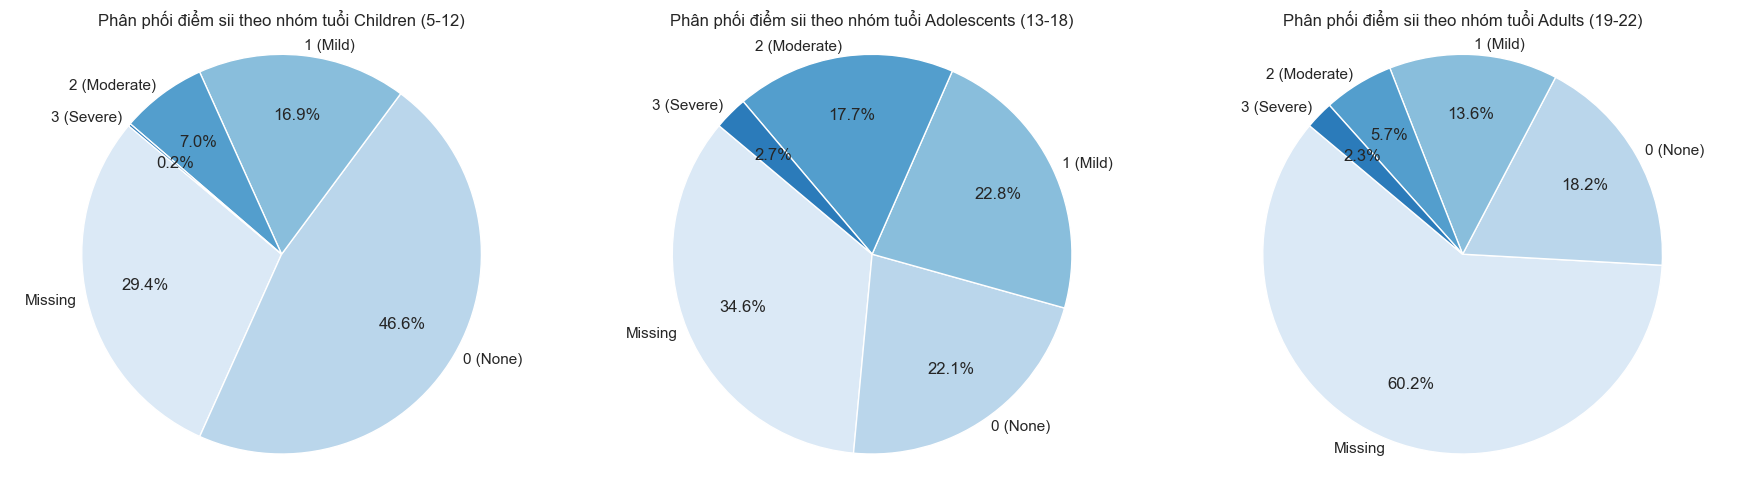

In [19]:
# tính toán phân phối điểm PCIAT theo nhóm độ tuổi và sii
stats = train.groupby(['Age Group', 'sii']).size().unstack(fill_value=0)  

# Tạo một hàng các biểu đồ con với số cột là sô số nhóm của stats (3 nhóm là children, adolescents, adults)
fig, axes = plt.subplots(1, len(stats), figsize=(18, 5))


# Vẽ biểu đồ pie cho mỗi nhóm tuổi
for i, age_group in enumerate(stats.index):
    group_counts = stats.loc[age_group] / stats.loc[age_group].sum() 
    axes[i].pie(
        group_counts, labels=group_counts.index, autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette('Blues'),
        labeldistance=1.05, pctdistance=0.7)
    axes[i].set_title(f'Phân phối điểm sii theo nhóm tuổi {age_group}')
    axes[i].axis('equal')
    
plt.tight_layout()
plt.show()


Phân tích biểu đồ Tròn (Pie Charts):

 - Phân phối của SII theo độ tuổi: Phân phối SII ở nhóm trẻ em và người lớn chủ yếu nghiêng về các giá trị thấp hơn (None và Mild), trong khi nhóm thanh thiếu niên có phân phối khá cân bằng giữa các giá trị "None", "Mild" và "Moderate".
Do nhóm trẻ em và người lớn có xu hướng không gặp phải vấn đề nghiêm trọng với sử dụng Internet, trong khi thanh thiếu niên có sự phân bổ rộng hơn, cho thấy một số vấn đề đang bắt đầu phát sinh ở nhóm này.



Phân bố tỉ lệ các nhóm tuổi theo từng mức sii

In [20]:
age_group_sii_distribution = train.groupby(['Age Group', 'sii']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1).applymap(lambda x: f'{x:.1f}%')
age_group_sii_distribution_counts = train.groupby(['Age Group', 'sii']).size().unstack(fill_value=0)
age_group_sii_distribution_combined = age_group_sii_distribution_counts.astype(str) + ' (' + age_group_sii_distribution + ')'
age_group_sii_distribution_combined


sii                      Missing      0 (None)     1 (Mild) 2 (Moderate)  \
Age Group                                                                  
Children (5-12)      858 (29.4%)  1359 (46.6%)  493 (16.9%)   203 (7.0%)   
Adolescents (13-18)  330 (34.6%)   211 (22.1%)  217 (22.8%)  169 (17.7%)   
Adults (19-22)        53 (60.2%)    16 (18.2%)   12 (13.6%)     5 (5.7%)   

sii                 3 (Severe)  
Age Group                       
Children (5-12)       6 (0.2%)  
Adolescents (13-18)  26 (2.7%)  
Adults (19-22)        2 (2.3%)

Nhận xét: 
- Nhóm tuổi trẻ em chủ yếu có mức độ nghiện thấp, với phần lớn rơi vào mức độ 0 (None) và 1 (Mild)
- Thanh thiếu niên có sự phân bố đa dạng hơn, với một tỷ lệ đáng kể ở mức độ 2 (Moderate)
- Người lớn có tỷ lệ Missing cao

In [21]:
stats = train[train['sii'] != 'Missing'].groupby(
    ['Age Group', 'sii']
).size().unstack(fill_value=0)
stats_prop = stats.div(stats.sum(axis=1), axis=0) * 100

stats = stats.astype(str) +' (' + stats_prop.round(1).astype(str) + '%)'
stats

sii                   Missing      0 (None)     1 (Mild) 2 (Moderate)  \
Age Group                                                               
Children (5-12)      0 (0.0%)  1359 (65.9%)  493 (23.9%)   203 (9.8%)   
Adolescents (13-18)  0 (0.0%)   211 (33.9%)  217 (34.8%)  169 (27.1%)   
Adults (19-22)       0 (0.0%)    16 (45.7%)   12 (34.3%)    5 (14.3%)   

sii                 3 (Severe)  
Age Group                       
Children (5-12)       6 (0.3%)  
Adolescents (13-18)  26 (4.2%)  
Adults (19-22)        2 (5.7%)

Vấn đề với kích thước mẫu không đồng đều:

 - Số lượng thanh thiếu niên ít hơn so với trẻ em, và số lượng người lớn thì rất ít (chỉ có 88 người, và trong đó chỉ 36 người có SII). Do mẫu dữ liệu của bạn không đồng đều, với số lượng mẫu thanh thiếu niên và người lớn ít hơn nhiều so với trẻ em. Điều này có thể dẫn đến những sai lệch trong phân tích, bởi vì các nhóm thiếu đại diện có thể không phản ánh chính xác tình trạng của toàn bộ quần thể.



Vấn đề phân bố không đều của SII:

 - Phân phối tổng thể của SII bị méo mó và có xu hướng nghiêng về các giá trị thấp. Các trường hợp nghiêm trọng rất hiếm, điều này có thể tạo ra các mối quan hệ mà chúng ta không thể thấy được do số lượng mẫu không đồng đều và sự thiếu đại diện của các trường hợp nghiêm trọng. Nếu dữ liệu bị lệch về một phía (ví dụ, quá nhiều trường hợp nhẹ và rất ít trường hợp nghiêm trọng), điều này có thể làm cho các mô hình học máy hoặc phân tích thống kê không chính xác, vì chúng không đủ mẫu để đại diện cho toàn bộ phân phối. Các mối quan hệ tiềm ẩn có thể bị che khuất hoặc không thể nhìn thấy do sự thiếu sót của các trường hợp cực đoan.



# III. Ảnh hưởng của mùa đến điểm sii

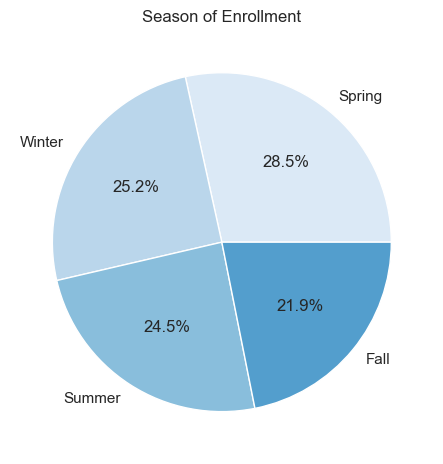

In [22]:
season_pie = train['Basic_Demos-Enroll_Season'].value_counts()
plt.pie(season_pie.values, labels=season_pie.index, autopct='%1.1f%%', colors=sns.color_palette('Blues'))
plt.title('Season of Enrollment')
plt.tight_layout()
plt.show()

 - Nhận xét: Các cột mùa có dữ liệu không liên quan và có tỉ lệ phân bố đồng đều. Vậy dữ liệu mùa không ảnh hưởng đến kết quả sii. Như vậy có thể đưa ra phương án loại bỏ các cột có 'Season' ra khỏi dữ liệu

# Nhận dạng một số đặc trưng có tác động qua lại 

Các cột mới được tạo ra nhằm mục đích kết hợp các đặc trưng sẵn có để tạo ra các biến số phức tạp hơn, giúp máy có khả năng nắm bắt được nhiều mối quan hệ giữa các yếu tố trong dữ liệu. Từ đó giúp máy học được dữ liệu một các hiệu quả hơn
1. BMI_Age: Chỉ số khối cơ thể (BMI) nhân với tuổi.
data['BMI_Age'] = data['Physical-BMI'] * data['Basic_Demos-Age']
 -> Đo lường ảnh hưởng của độ tuổi đến BMI, vì BMI có thể thay đổi theo tuổi.
2. Internet_Hours_Age: Số giờ sử dụng máy tính/internet mỗi ngày nhân với tuổi.
data['Internet_Hours_Age'] = data['PreInt_EduHx-computerinternet_hoursday'] * data['Basic_Demos-Age']
-> Đo lường mức độ ảnh hưởng của độ tuổi đến thời gian sử dụng internet.
3. BMI_Internet_Hours: Kết hợp giữa BMI và số giờ sử dụng internet mỗi ngày.
data['BMI_Internet_Hours'] = data['Physical-BMI'] * data['PreInt_EduHx-computerinternet_hoursday']
 -> Phân tích tác động của thời gian ngồi trước máy tính lên sức khỏe qua chỉ số BMI.
4. BFP_BMI: Tỷ lệ phần trăm mỡ cơ thể (Body Fat Percentage - BFP) chia cho chỉ số BMI.
data['BFP_BMI'] = data['BIA-BIA_Fat'] / data['BIA-BIA_BMI']
 -> Đánh giá sự tương quan giữa tỷ lệ mỡ cơ thể và BMI.
5. FFMI_BFP: Tỷ lệ giữa FFMI (Fat-Free Mass Index - Chỉ số khối lượng cơ thể không mỡ) và BFP.
data['FFMI_BFP'] = data['BIA-BIA_FFMI'] / data['BIA-BIA_Fat']
 -> Đánh giá tỷ lệ cơ bắp và mỡ trong cơ thể.
6. FMI_BFP: Tỷ lệ giữa FMI (Fat Mass Index - Chỉ số khối lượng mỡ) và BFP.
data['FMI_BFP'] = data['BIA-BIA_FMI'] / data['BIA-BIA_Fat']
 -> Đo lường mối quan hệ giữa tổng lượng mỡ và phần trăm mỡ cơ thể.
7. LST_TBW: Tỷ lệ giữa khối lượng cơ thể không mỡ (Lean Soft Tissue - LST) và tổng lượng nước trong cơ thể (Total Body Water - TBW).
data['LST_TBW'] = data['BIA-BIA_LST'] / data['BIA-BIA_TBW']
 -> Phân tích vai trò của lượng nước cơ thể trong việc duy trì cơ bắp.
8. BFP_BMR: Tỷ lệ phần trăm mỡ cơ thể nhân với tốc độ trao đổi chất cơ bản (Basal Metabolic Rate - BMR).
data['BFP_BMR'] = data['BIA-BIA_Fat'] * data['BIA-BIA_BMR']
 -> Đo lường ảnh hưởng của mỡ cơ thể đến tốc độ trao đổi chất.
9. BFP_DEE: Tỷ lệ phần trăm mỡ cơ thể nhân với năng lượng tiêu hao hàng ngày (Daily Energy Expenditure - DEE).
data['BFP_DEE'] = data['BIA-BIA_Fat'] * data['BIA-BIA_DEE']
 -> Đánh giá mức năng lượng tiêu hao hàng ngày có liên quan đến lượng mỡ trong cơ thể.
10. BMR_Weight: Tỷ lệ giữa tốc độ trao đổi chất cơ bản và cân nặng.
data['BMR_Weight'] = data['BIA-BIA_BMR'] / data['Physical-Weight']
 -> Phân tích mối quan hệ giữa cân nặng và BMR.
11. DEE_Weight: Tỷ lệ giữa năng lượng tiêu hao hàng ngày và cân nặng.
data['DEE_Weight'] = data['BIA-BIA_DEE'] / data['Physical-Weight']
 -> Xem xét mức tiêu hao năng lượng so với cân nặng cơ thể.
12. SMM_Height: Tỷ lệ giữa khối lượng cơ xương (Skeletal Muscle Mass - SMM) và chiều cao.
data['SMM_Height'] = data['BIA-BIA_SMM'] / data['Physical-Height']
 -> Phân tích ảnh hưởng của chiều cao đến khối lượng cơ.
13. Muscle_to_Fat: Tỷ lệ giữa khối lượng cơ xương và chỉ số khối lượng mỡ.
data['Muscle_to_Fat'] = data['BIA-BIA_SMM'] / data['BIA-BIA_FMI']
 -> Xác định sự cân bằng giữa cơ bắp và mỡ trong cơ thể.
14. Hydration_Status: Tỷ lệ giữa tổng lượng nước cơ thể và cân nặng.
data['Hydration_Status'] = data['BIA-BIA_TBW'] / data['Physical-Weight']
 -> Đánh giá tình trạng hydrat hóa của cơ thể.
15. ICW_TBW: Tỷ lệ giữa lượng nước trong tế bào (Intracellular Water - ICW) và tổng lượng nước cơ thể.
data['ICW_TBW'] = data['BIA-BIA_ICW'] / data['BIA-BIA_TBW']
 -> Đo lường sự phân bố nước trong cơ thể, đánh giá sức khỏe tế bào.